# Quantum dimension of machine learning 

*~ QubitFreaks*

---

Quantum computers unlike regular computers are operating on qubits - quantum bits, which values might not only be 0 or 1, but they could be a quantum superposition of both 1 and 0. That's why quantum computers are way more efficient than normal ones. 
Some of their biggest advantages are fast processing of complex data, efficient handling of high-dimensional spaces, and that's what makes them excellent for machine learning.
Now we will show you a simple way to use quantum computers to train an machine learning model. It will example be classification problem. 

## 1. 📃 Lets generate a sample of data for training and testing

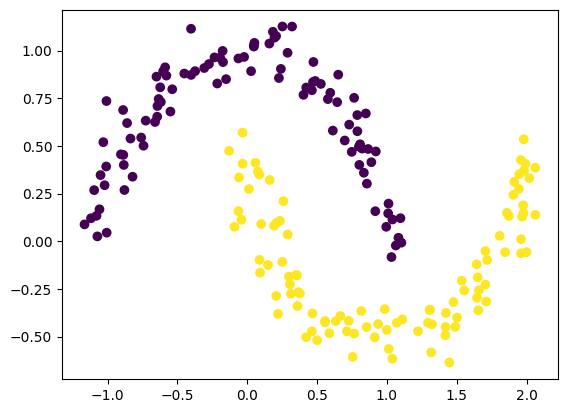

In [60]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

X, y = make_moons(
    n_samples=200, 
    noise=.08,
    random_state=32
)

plt.scatter(X[:,0], X[:,1], c=y)

We just created data that could be example of classification problem.



We can do that by "drawing" a line between these two groups of points. 

Here is classic and basic method for that called **linear regression**. It's implemented in SVC classical alghoritm

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_seed)

In [61]:
from qiskit.circuit.library import PauliFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

special = False

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="9a9a4943be56be9ecf17ca41bc0eb098566c38f48c60854e5aaa47c58dede449234a6b2f4a33de8b02e95c9448deb3260e59102e25b3ea69c608f895e1102a12",
    set_as_default=True,
    overwrite=True
)

from qiskit_ibm_runtime import Estimator, QiskitRuntimeService, Session
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import BackendSampler
from qiskit_machine_learning.algorithms import QSVC

pauli_feature_map = PauliFeatureMap(
    feature_dimension=len(X[0]), 
    reps=2, 
    entanglement='full', 
    paulis=None, 
    data_map_func=None, 
    parameter_prefix='x', 
    insert_barriers=False
)

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)

if special:
    with Session(backend=backend) as session:
        estimator = Estimator()
        sampler = BackendSampler(backend)
        fidelity = ComputeUncompute(sampler)
        
        qkernel_PauliFeatureMap = FidelityQuantumKernel(fidelity=fidelity, feature_map=pauli_feature_map)

        qsvc = QSVC(quantum_kernel=qkernel_PauliFeatureMap)
        qsvc.fit(X_train, y_train)
        qsvc_score = qsvc.score(X_test, y_test)

        print(f"QSVC classification test score: {qsvc_score*100}%") 
        #train = qkernel_PauliFeatureMap.evaluate(x_vec=X_train)

qkernel_PauliFeatureMap = FidelityQuantumKernel(fidelity=fidelity, feature_map=pauli_feature_map) 

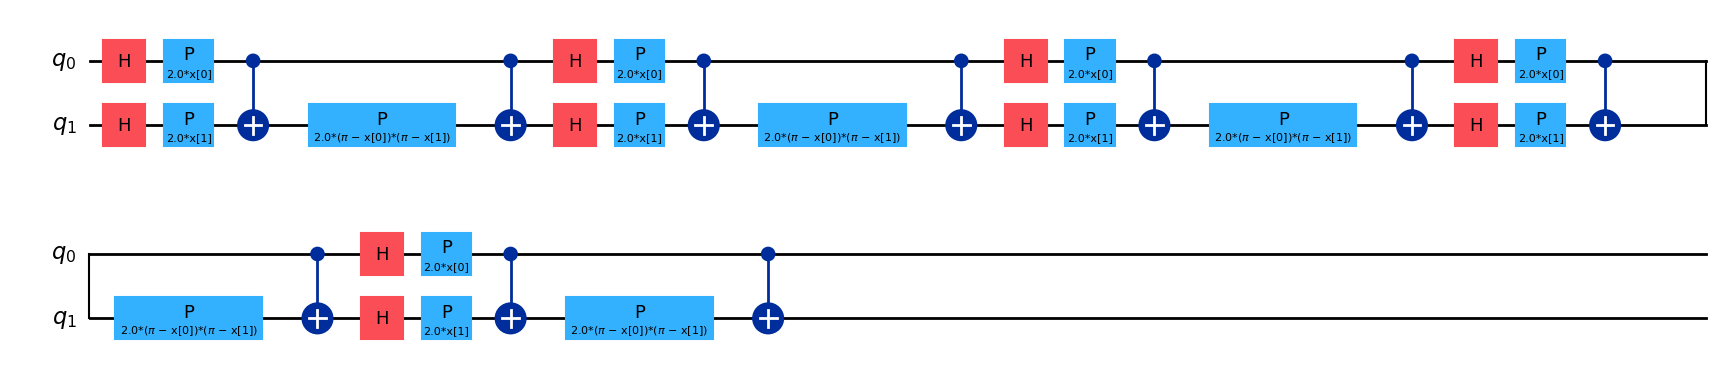

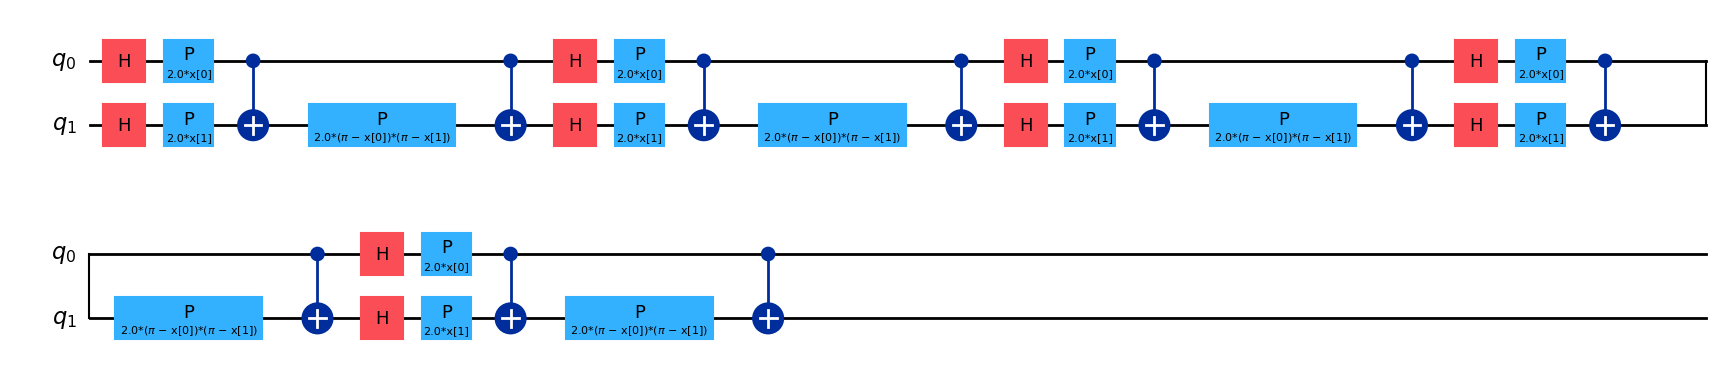

In [22]:
from qiskit.visualization import circuit_drawer
circuit_drawer(dataset_feature_map.decompose(), output='mpl')

In [25]:
%%time
moon_matrix_train = quantum_kernel.evaluate(x_vec=X_train) 
moon_matrix_test = quantum_kernel.evaluate(x_vec=X_test, y_vec=X_train)

CPU times: total: 1min 43s
Wall time: 5min 16s


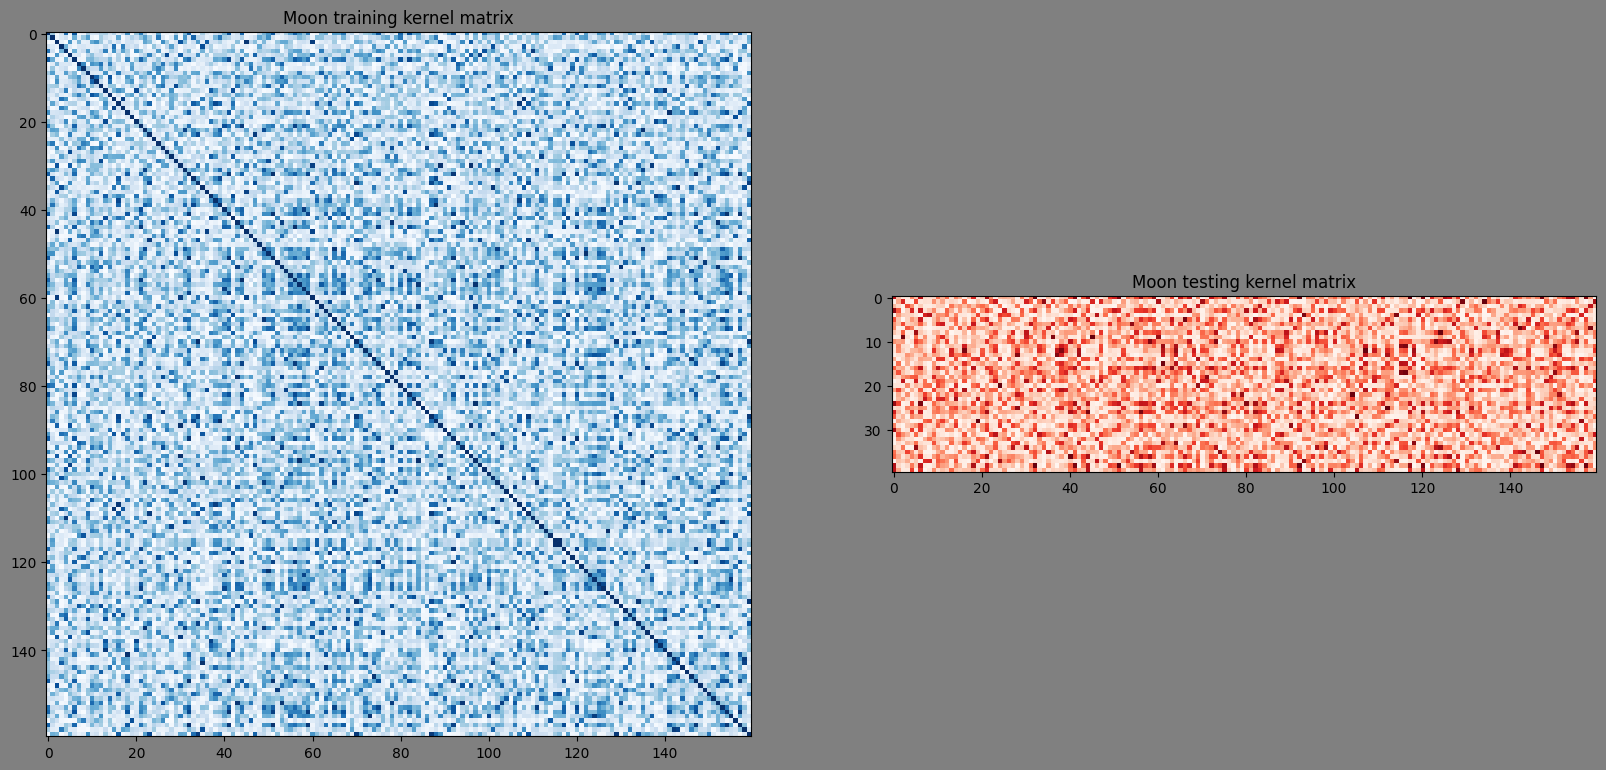

In [26]:
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(20, 10), facecolor='grey')

axs[0].imshow(
    np.asmatrix(moon_matrix_train), 
    interpolation="nearest", 
    origin="upper", 
    cmap="Blues"
)
axs[0].set_title("Moon training kernel matrix")

axs[1].imshow(
    np.asmatrix(moon_matrix_test), 
    interpolation="nearest", 
    origin="upper", 
    cmap="Reds"
)
axs[1].set_title("Moon testing kernel matrix")

plt.show()

### Wyjaśnienie
#### `Moon training kernel matrix`
Wartości na osi $x$ i wartości na osi $y$ są takie same, a gradient kolorów pikseli reprezentje poziom podobieństwa ich wartości.

Kolor **granatowy** = *takie same*, kolor **biały** = *zupełnie różne*. 

Zgodnie z powyższym, piksele znajdujące się na współrzędnych $x=y$ są granatowe, ponieważ porównywane są te same wartości, w wyniku czego powstaje linia przekątna. 

#### `Moon testing kernel matrix`
Tutaj porównywane jest podobieństwo danych treningowych (oś $x$) z danymi testowymi (oś $y$)

In [28]:
%%time
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=qkernel_PauliFeatureMap)
qsvc.fit(X_train, y_train)
qsvc_score = qsvc.score(X_test, y_test)

print(f"QSVC classification test score: {qsvc_score*100}%")

QSVC classification test score: 70.0%
CPU times: total: 1min 41s
Wall time: 4min 32s


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = qsvc.decision_function(xy).reshape(XX.shape)

ax.contourf(XX, YY, Z, levels=[Z.min(), 0, Z.max()], colors=['#FFAAAA', '#AAAAFF'], alpha=0.8)
ax.contour(XX, YY, Z, colors='k', levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('QSVC Decision Boundary with Colored Regions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()